In [1]:
import networkx as nx
import pandas as pd
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('./表间关系.csv')
df

,表一,表二,表间关系
0,ENTRY_DATA,OFFICE_CODES,一对一
1,ENTRY_DATA,BIOG_INST_DATA,一对多
2,ENTRY_DATA,STATUS_DATA,一对一
3,ENTRY_DATA,EVENTS_DATA,一对多
4,ENTRY_DATA,ALTNAME_DATA,一对一
...,...,...,...
465,BIOG_SOURCE_DATA,BIOG_MAIN,一对多
466,ENTRY_DATA,ENTRY_TYPES,多对多
467,STATUS_DATA,STATUS_TYPES,多对多
468,ENTRY_DATA,ASSOC_TYPES,多对多


In [3]:
G = nx.DiGraph()
for index, row in df.iterrows():
    if row['表间关系'] == '一对一':
        G.add_edge(row['表一'], row['表二'], color='green')
    elif row['表间关系'] == '一对多':
        G.add_edge(row['表一'], row['表二'], color='blue')
    elif row['表间关系'] == '多对多':
        G.add_edge(row['表一'], row['表二'], color='red')
        
pos = nx.spring_layout(G, k=2)
pos

{'ENTRY_DATA': array([-0.9545557 , -0.01818233]),
 'OFFICE_CODES': array([0.01061621, 0.74026936]),
 'BIOG_INST_DATA': array([-0.09550662, -0.3983528 ]),
 'STATUS_DATA': array([-0.28889   ,  0.57118581]),
 'EVENTS_DATA': array([-0.0537082 ,  0.03792982]),
 'ALTNAME_DATA': array([0.16141565, 0.89884629]),
 'POSTED_TO_ADDR_DATA': array([-0.28091427, -0.46399652]),
 'TEXT_INSTANCE_DATA': array([-0.85297233, -0.51861115]),
 'ASSOC_DATA': array([0.36938704, 0.26629211]),
 'BIOG_ADDR_DATA': array([-0.44461544,  0.87851284]),
 'TEXT_CODES': array([-0.0975132 ,  0.52398461]),
 'POSTING_DATA': array([-0.26931213, -0.22359118]),
 'KIN_DATA': array([ 0.01781495, -0.19896649]),
 'BIOG_TEXT_DATA': array([ 0.67546929, -0.21228031]),
 'POSTED_TO_OFFICE_DATA': array([-0.15229687, -0.63538024]),
 'BIOG_MAIN': array([-0.28347846,  0.12246   ]),
 'PLACE_CODES': array([ 0.88587281, -0.21097718]),
 'ADDR_PLACE_DATA': array([-0.52375796, -0.48983772]),
 'SOCIAL_INSTITUTION_NAME_CODES': array([0.1710763 , 0.

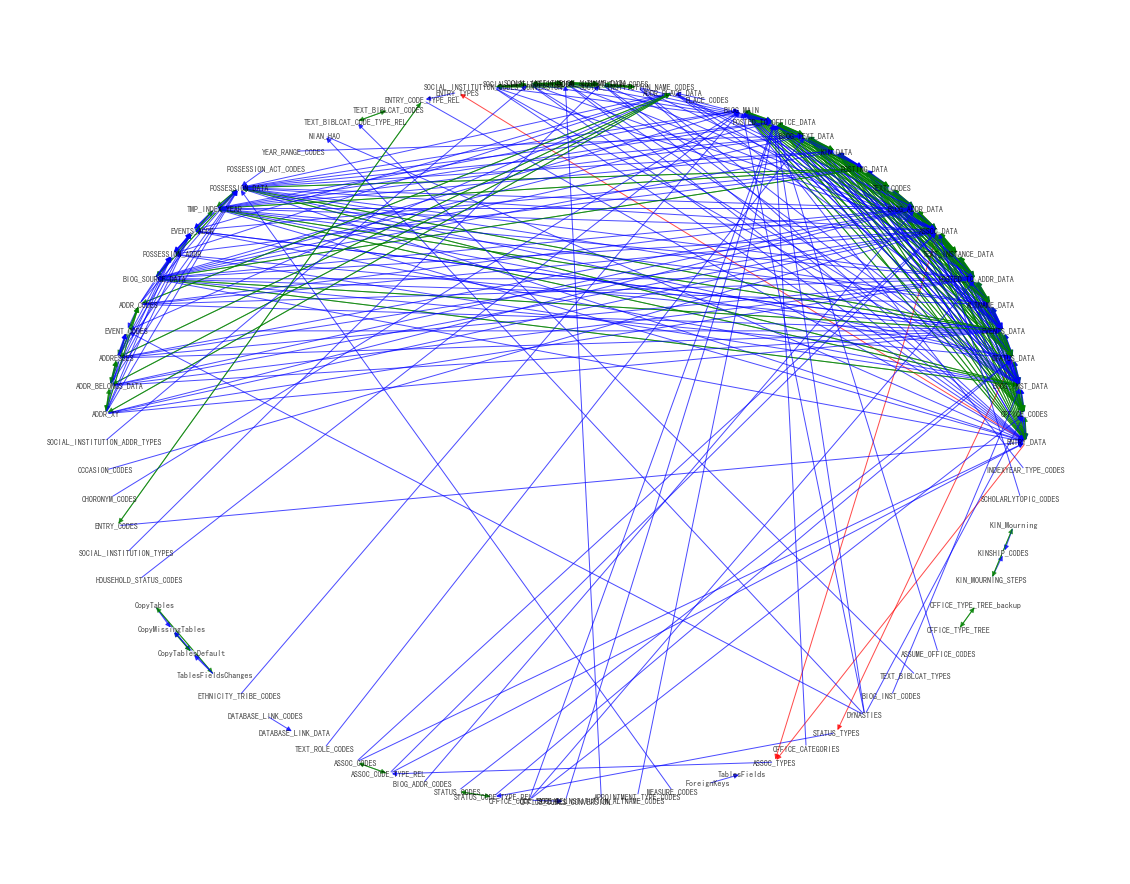

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 16))
ax=plt.gca()
#pos = nx.spring_layout(G, k=2),
nx.draw_circular(G, node_color='white', edge_color=[G.edges[i]['color'] for i in G.edges], with_labels = True, font_size=8, node_size=30, ax=ax, alpha=0.7)
plt.savefig("table_relationship.pdf", bbox_inches='tight')
plt.show()